# U.S. Standard Atmosphere 1976

This is probable one of the most famous atmospheric models of all time, because of its huge implementation not only within aerospace engineering, but also because its usage by ICAO organization. Some of its physical variables have been updated since the publication of the model. However, as done with other implementations, original values have been kept in order to replicate original report tables.

The U.S. Standard Amosphere 1976, also known as COESA76, it is characterized by making a division into lower and upper atmosphere at 86km geometrical height. At lower atmosphere, air is cosidered to be an ideal gas but for altitudes greater than 86km, atmospheric gases dissociate and air can not be assumed anymore to behave like ideal gases do.

## Molecular weight near 86km

The division region between lower and upper atmosphere does not exactly take place at 86km but before. Atlghough with a minimium incidence in final results, air's mean molecular weight does not remain constant above 79km geopotential height and thus, a correction factor is required to achieve accurate values. Table 8 from official report holds some of those correction factors for a given set of altitudes. However, if we desire to compute for a particular value within provided ones, an interpolation is required. Let us see that in action!

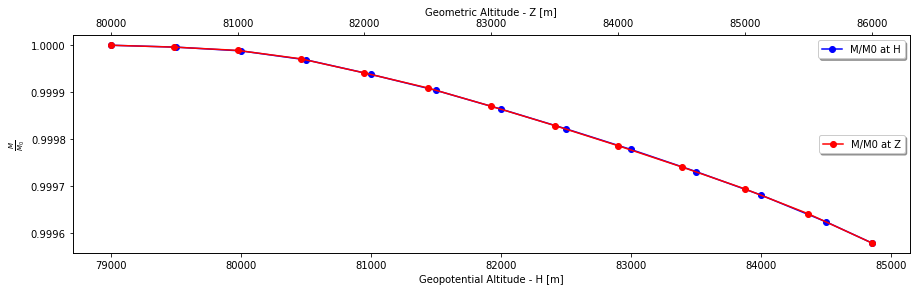

In [1]:
# Import required modules
import matplotlib.pyplot as plt
import numpy as np
from atmopy.coesa76 import constants as c

# Initialize the figure
fig_M_M0, ax_M_M0 = plt.subplots(1,1, figsize=(15,4))
ax_M_M0.set_ylabel(r"$\frac{M}{M_{0}}$")

# Plot table 8 from U.S. Standard Atmosphere 1976
ax_M_M0_Z = ax_M_M0.twiny()

# As function of geopotential height
ax_M_M0.plot(
    c.M_M0_H_table_under_86km[0],
    c.M_M0_H_table_under_86km[-1],
    "-bo",
    label=r"M/M0 at H"
)
ax_M_M0.set_xlabel("Geopotential Altitude - H [m]")

# As function of geometric height
ax_M_M0_Z.plot(
    c.M_M0_Z_table_under_86km[0],
    c.M_M0_Z_table_under_86km[-1],
    "-ro",
    label=r"M/M0 at Z",
)
ax_M_M0_Z.set_xlabel("Geometric Altitude - Z [m]")

ax_M_M0.legend(shadow=True)
ax_M_M0_Z.legend(loc="right", shadow=True)

plt.show()

## Temperature as function of height

Temperature evolution is very interesting

In [2]:
# Import core module of COESA76 sub-package
from atmopy import coesa76

# Just pass an array of altitudes to solve for desired temperature profile
Z_set = np.linspace(0, 1000e3, int(1e3))
T_set = coesa76.T_at_Z(Z_set)

However, previous result is juts interesting from the computational point of view. What about from a visual one? Let us generate a cool figure showing up the complete temperature evolution from ground level till 1000 [km] geometrical height with a zoom in 86 [km] region!

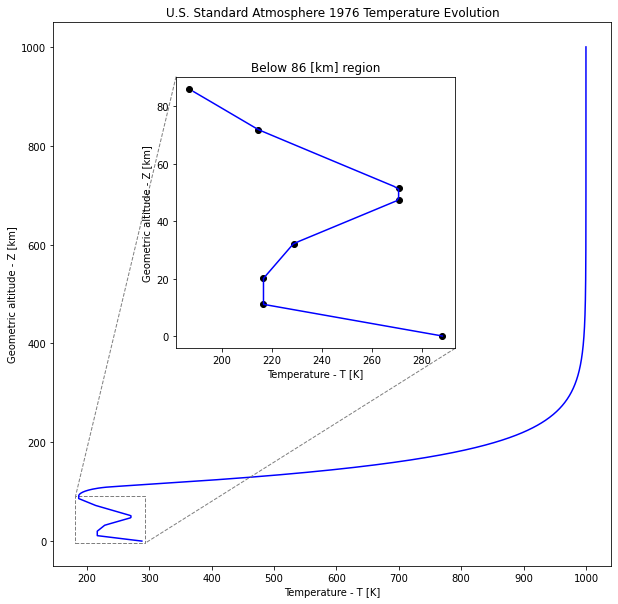

In [3]:
# Prepare figure, axis and inset axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from atmopy.coesa76.utils import T_at_H_under_86km, Z_at_H

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_title("U.S. Standard Atmosphere 1976 Temperature Evolution")
ax.set_xlabel("Temperature - T [K]")
ax.set_ylabel("Geometric altitude - Z [km]")

# Zoom inset axes
axins = ax.inset_axes([0.22, 0.4, 0.5, 0.5])
mark_inset(ax, axins, loc1=2, loc2=4, linestyle="--", ec='0.5')

# Plot previously computed values
ax.plot(T_set, Z_set / 1e3, "b")

# Zoom below 86 [km] region
inside_86km = Z_set <= 86000
axins.plot(T_set[inside_86km], Z_set[inside_86km] / 1e3, "b")
axins.scatter([T_at_H_under_86km(H) for H in c.H_b], [Z_at_H(H) / 1e3 for H in c.H_b], color="black")
axins.set_xlabel("Temperature - T [K]")
axins.set_ylabel("Geometric altitude - Z [km]")
axins.set_title("Below 86 [km] region")


plt.savefig("coesa76.png")
plt.show()